In [77]:
import opendatasets as od
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [79]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [80]:
data=pd.read_csv(r'C:\Users\HP\Downloads\archive (2)\creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [82]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

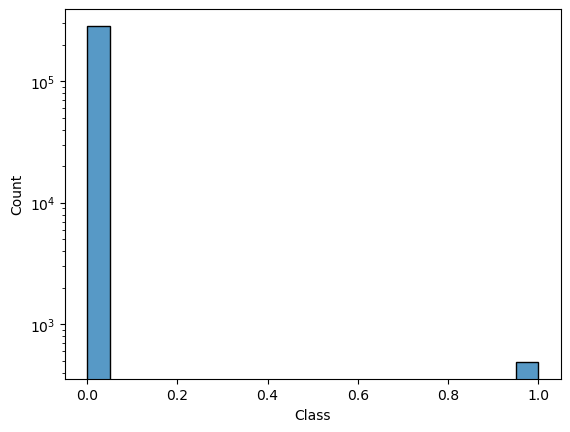

In [83]:
sns.histplot(data['Class'])
plt.yscale('log')
plt.show()

In [84]:
data.groupby('Class')['Amount'].sum()

Class
0    25102462.04
1       60127.97
Name: Amount, dtype: float64

In [85]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [86]:
x_dummy=data.drop(columns='Class', axis=1)
y=data['Class']

In [87]:
scaler=StandardScaler()
x=scaler.fit_transform(x_dummy)

In [88]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.20, random_state=123)
print(f'x_train{x_train.shape}\n, x_test{x_test.shape}\n, y_train{y_train.shape}\n, y_test{y_test.shape}')

x_train(227845, 30)
, x_test(56962, 30)
, y_train(227845,)
, y_test(56962,)


# Logistic Regression

In [89]:
def logic_regression(x_train, y_train, x_test):
 lr=LogisticRegression()
 lr.fit(x_train, y_train)
 y_train_pred=lr.predict(x_train)
 y_train_cl_report=classification_report(y_train, y_train_pred, target_names = ['No Fraud', 'Fraud'])
 print("_"*100)
 print("TRAIN MODEL CLASSIFICATION REPORT")
 print("_"*100)
 print(y_train_cl_report)
 y_test_pred=lr.predict(x_test)
 y_test_cl_report=classification_report(y_test, y_test_pred, target_names = ['No Fraud', 'Fraud'])
 print("_"*100)
 print("TEST MODEL CLASSIFICATION REPORT")
 print("_"*100)
 print(y_test_cl_report)
 print("_"*100)
 return y_test_pred, lr

In [90]:
y_test_pred, lr= logic_regression(x_train, y_train, x_test)

____________________________________________________________________________________________________
TRAIN MODEL CLASSIFICATION REPORT
____________________________________________________________________________________________________
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00    227468
       Fraud       0.89      0.63      0.74       377

    accuracy                           1.00    227845
   macro avg       0.94      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845

____________________________________________________________________________________________________
TEST MODEL CLASSIFICATION REPORT
____________________________________________________________________________________________________
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56847
       Fraud       0.83      0.61      0.70       115

    accuracy                          

In [91]:
def conf_mat(y_test, y_test_pred):
 con_mat=confusion_matrix(y_test, y_test_pred)
 labels = ['No Fraud', 'Fraud']
 sns.heatmap(con_mat, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted')
 plt.ylabel('Actual')
 plt.show()

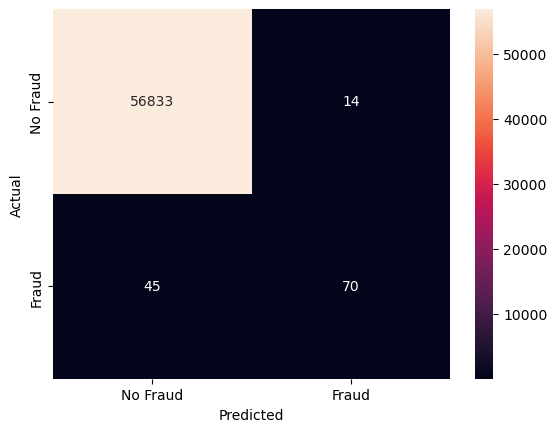

In [92]:
conf_mat(y_test, y_test_pred)

# KNEIGHBORS CLASSIFICATION MODEL

In [93]:
def KNeighbors(x_train, y_train, x_test):
 Kneib=KNeighborsClassifier(n_neighbors=4)
 Kneib.fit(x_train, y_train)
 y_train_pred=Kneib.predict(x_train)
 y_train_cl_report=classification_report(y_train, y_train_pred, target_names = ['No Fraud', 'Fraud'])
 print("_"*50)
 print("TRAIN MODEL CLASSIFICATION REPORT")
 print("_"*50)
 print(y_train_cl_report)
 y_test_pred=Kneib.predict(x_test)
 y_test_cl_report=classification_report(y_test, y_test_pred, target_names = ['No Fraud', 'Fraud'])
 print("_"*50)
 print("TEST MODEL CLASSIFICATION REPORT")
 print("_"*50)
 print(y_test_cl_report)
 print("_"*50)
 return y_test_pred,Kneib

In [94]:
y_test_pred, Kneib=KNeighbors(x_train, y_train, x_test)

__________________________________________________
TRAIN MODEL CLASSIFICATION REPORT
__________________________________________________
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00    227468
       Fraud       0.97      0.79      0.87       377

    accuracy                           1.00    227845
   macro avg       0.99      0.89      0.93    227845
weighted avg       1.00      1.00      1.00    227845

__________________________________________________
TEST MODEL CLASSIFICATION REPORT
__________________________________________________
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56847
       Fraud       0.95      0.78      0.86       115

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

__________________________________________________


In [95]:
lr_prob=lr.predict_proba(x_test)
KNeib_prob=Kneib.predict_proba(x_test)
fpr1, tpr1, thresh1=roc_curve(y_test, lr_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2=roc_curve(y_test, KNeib_prob[:,1], pos_label=1)
optimal_thres_lr=thresh1[np.argmax(tpr1 - fpr1)]
optimal_thres_KNeib=thresh2[np.argmax(tpr2 - fpr2)]
# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
print(f" optimal_thres_lr\t {optimal_thres_lr} \n optimal_thres_KNeib\t{optimal_thres_KNeib}")

 optimal_thres_lr	 0.007890862081579283 
 optimal_thres_KNeib	0.25


In [96]:
opt={'Logistic Regression':optimal_thres_lr,'KNeighbors Classification':optimal_thres_KNeib}
for model, thresh in opt.items():
    if model == 'Logistic Regression':
        y_test_pred_adj=lr.predict_proba(x_test)[:,1]
    elif model =='KNeighbors Classification':
        y_test_pred_adj=Kneib.predict_proba(x_test)[:,1]     
    y_test_pred_adj1 = (y_test_pred_adj >= thresh).astype(int)
    ac_score = accuracy_score(y_test, y_test_pred_adj1)
    ROC_AC=roc_auc_score(y_test, y_test_pred_adj1)

    print("_" * 50)
    print(f"Model: {model}")
    print(f"Threshold: {thresh}")
    print(f"Accuracy Score: {ac_score}")
    print(f"ROC Accuracy Score: {ROC_AC}")
    print("_" * 50)

    y_test_cl_report_adj = classification_report(y_test, y_test_pred_adj1, target_names=['No Fraud', 'Fraud'])
    print("_" * 50)
    print("Classification Report:")
    print(y_test_cl_report_adj)
    print("_" * 50)

__________________________________________________
Model: Logistic Regression
Threshold: 0.007890862081579283
Accuracy Score: 0.9960675538078017
ROC Accuracy Score: 0.945961432709156
__________________________________________________
__________________________________________________
Classification Report:
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56847
       Fraud       0.33      0.90      0.48       115

    accuracy                           1.00     56962
   macro avg       0.66      0.95      0.74     56962
weighted avg       1.00      1.00      1.00     56962

__________________________________________________
__________________________________________________
Model: KNeighbors Classification
Threshold: 0.25
Accuracy Score: 0.9985955549313578
ROC Accuracy Score: 0.9298718681189247
__________________________________________________
__________________________________________________
Classification Report:
              p

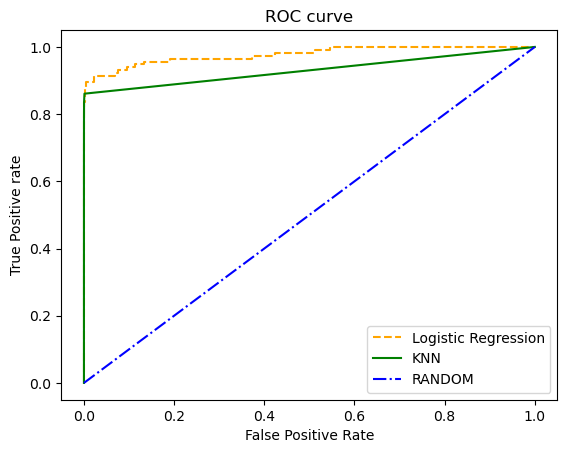

In [97]:
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='-',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='dashdot',color='blue', label='RANDOM')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [98]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [99]:
df_0 = data[data['Class'] == 0].sample(n=492, random_state=42)
df_1= data[data['Class'] == 1].sample(n=492, random_state=42)

In [100]:
print(f' Fraud Shape{df_1.shape}\n No Fraud shape{df_0.shape}')

 Fraud Shape(492, 31)
 No Fraud shape(492, 31)


In [101]:
df_concat=pd.concat([df_0,df_1], ignore_index=True)

In [102]:
df_concat.shape

(984, 31)

In [103]:
x_bal_dummy=df_concat.drop('Class', axis=1)
y_bal=df_concat['Class']
print(x_bal_dummy.shape, '\n', y_bal.shape)

(984, 30) 
 (984,)


In [104]:
x_bal=scaler.fit_transform(x_bal_dummy)

In [105]:
x_train_b, x_test_b, y_train_b, y_test_b=train_test_split(x_bal,y_bal, test_size=0.20, random_state=123)
print(f'x_train{x_train_b.shape}\n, x_test{x_test_b.shape}\n, y_train{y_train_b.shape}\n, y_test{y_test_b.shape}')

x_train(787, 30)
, x_test(197, 30)
, y_train(787,)
, y_test(197,)


# BALANCE DATASET LOGISTIC REGRESSION

In [106]:
bal_lr=LogisticRegression()
bal_lr.fit(x_train_b,y_train_b)
bal_pred_train=bal_lr.predict(x_train_b)
bal_pred_test=bal_lr.predict(x_test_b)

In [107]:
bal_cl_report_train=classification_report(y_train_b,bal_pred_train)
print(bal_cl_report_train)
bal_cl_report_test=classification_report(y_test_b,bal_pred_test)
print(bal_cl_report_test)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       383
           1       0.98      0.92      0.95       404

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       109
           1       0.96      0.92      0.94        88

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



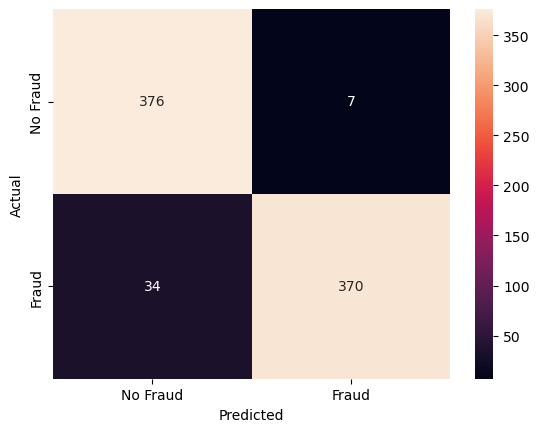

In [108]:
conf_mat(y_train_b,bal_pred_train)

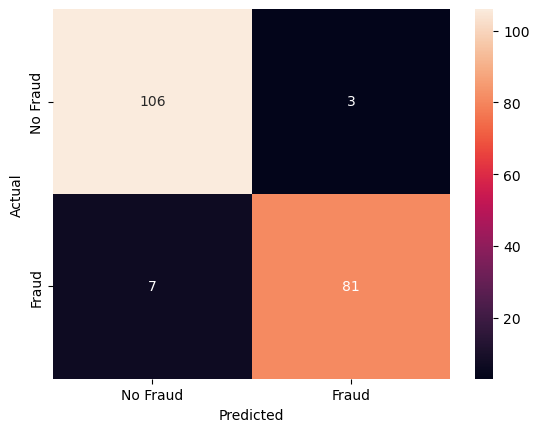

In [109]:
conf_mat(y_test_b,bal_pred_test)

# BALANCE DATASET KNEIGHBORS CLASSIFICATION

In [110]:
knn=KNeighborsClassifier()
knn.fit(x_train_b,y_train_b)
knn_bal_pred_train=bal_lr.predict(x_train_b)
knn_bal_pred_test=bal_lr.predict(x_test_b)

In [111]:
knn_bal_cl_report_train=classification_report(y_train_b,knn_bal_pred_train)
print(knn_bal_cl_report_train)
knn_bal_cl_report_test=classification_report(y_test_b,knn_bal_pred_test)
print(knn_bal_cl_report_test)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       383
           1       0.98      0.92      0.95       404

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       109
           1       0.96      0.92      0.94        88

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

